https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY_EXTENDED&symbol=IBM&interval=15min&slice=year1month1&apikey=demo

# Alpha Vantage API 
This notebook presents a simplified model for utilizing the alpha vantage API.

In [25]:
api_key = "" #you just have to put here your API key 

In [26]:
import pandas as pd 
import requests
import json
import io

In [27]:
def getMarketdata(marketSymbol,interval,slice1="year1month1") :
    url_base = "https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY_EXTENDED&"
    url = url_base+"symbol="+marketSymbol+"&interval="+interval+"&slice="+slice1+"&apikey="+api_key
    r=requests.get(url,timeout=10)
    s=r.content
    c=pd.read_csv(io.StringIO(s.decode('utf-8')))
    c = c.iloc[::-1].set_index('time')
    return c 

In [28]:
marketSymbol="ibm"
interval="1min"
month1 = getMarketdata(marketSymbol,interval,slice1="year1month1")

In [29]:
month2 = getMarketdata(marketSymbol,interval,slice1="year1month2")

In [30]:
month3=getMarketdata(marketSymbol,interval,slice1="year1month3")

In [31]:
month4 = getMarketdata(marketSymbol,interval,slice1="year1month4")

In [32]:
month5 = getMarketdata(marketSymbol,interval,slice1="year1month5")

In [33]:
df = pd.concat([month5,month4,month3,month2,month1]).drop_duplicates()


In [34]:

df.index = df.index.rename('date')
df

,open,high,low,close,volume
date,,,,,
2022-10-10 08:01:00,116.154878,116.154878,116.154878,116.154878,140
2022-10-10 08:06:00,116.146874,116.154878,116.146874,116.154878,448
2022-10-10 08:13:00,115.666832,115.666832,115.666832,115.666832,150
2022-10-10 08:30:00,116.154780,116.154878,116.154780,116.154878,2152
2022-10-10 08:33:00,115.970397,115.970397,115.970397,115.970397,150
...,...,...,...,...,...
2023-03-08 16:43:00,128.250000,128.250000,128.250000,128.250000,100
2023-03-08 17:21:00,128.050000,128.050000,128.050000,128.050000,100
2023-03-08 17:23:00,128.240000,128.240000,128.240000,128.240000,1000


<AxesSubplot:xlabel='date'>

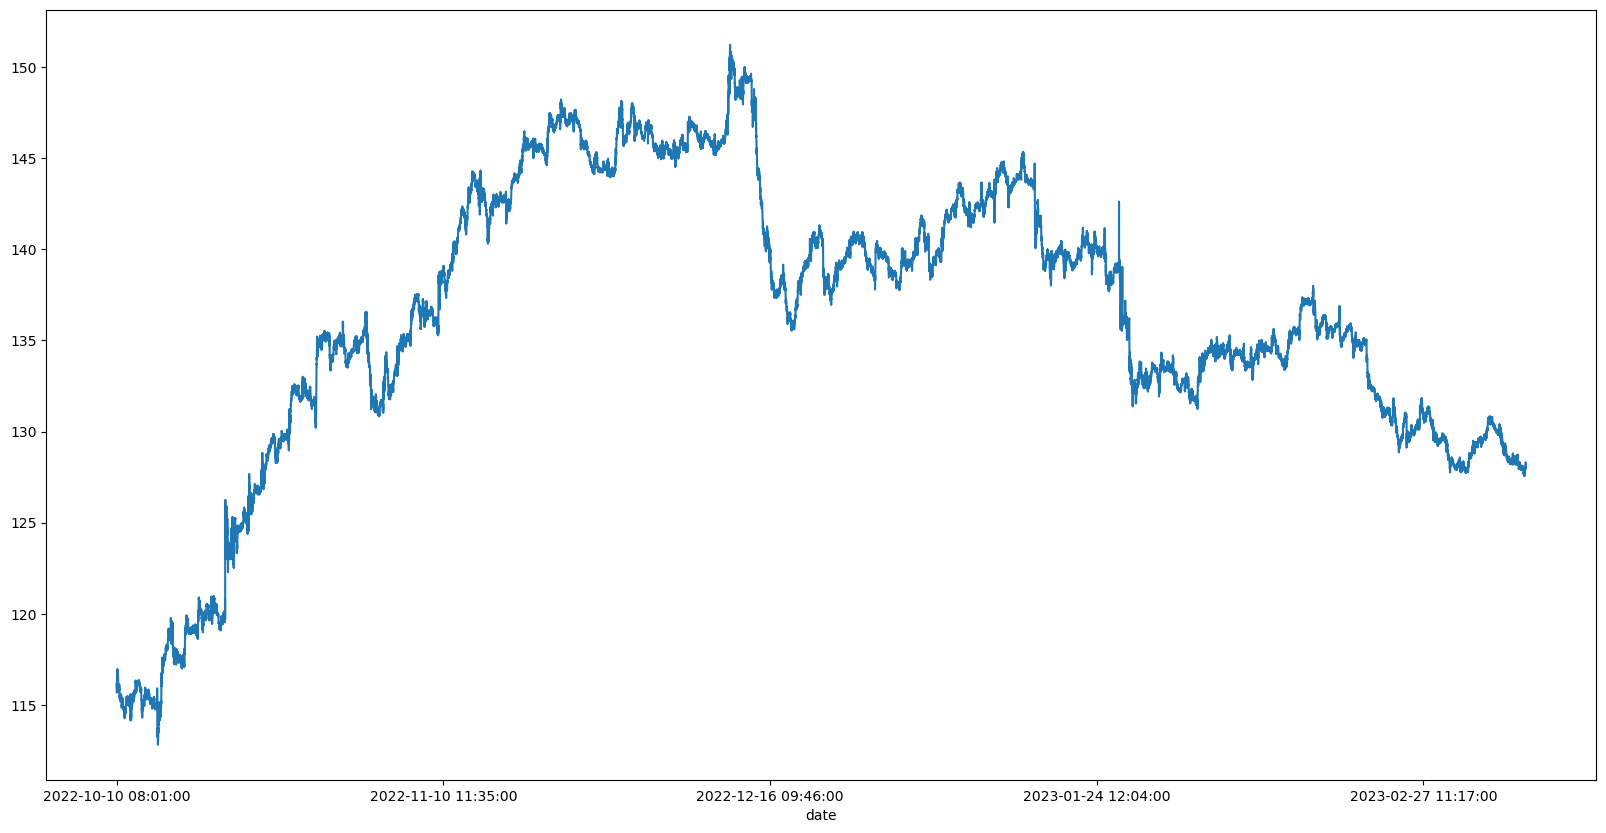

In [35]:
df['open'].plot(figsize=(20,10))